<a href="https://colab.research.google.com/github/JATC1024/Kaggle-House-Prices/blob/master/Kaglge_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KAGGLE HOUSE PRICES
This notebook is an attempt to compete in [Kaggle House Prices](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) competition.<br>
The goal of the competition is to predict house prices from some provided features.<br>
The data is collected from the competition itself.

## Data collection
The train data can be found [here](http://www.kaggle.com/c/digit-recognizer/download/train.csv).<br>
The test data can be found [here](http://www.kaggle.com/c/digit-recognizer/download/test.csv).

In [0]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [2]:
# Check if the collected data sets are correct
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data understanding
Now we're going to discover some insights about the data to get better understanding. Some steps we can follow:
1. Make an investigation on the data description provided by Kaggle.
2. Visualize the data.

**Note**: The following code requires **train.csv**, **test.csv**, **data_description.txt** and **brief.txt** are placed in the current directory.

**How big is the data**<br>
It's good to see how big the data we're dealing with.

In [4]:
train_data.shape

(1460, 81)

As we can see, the data contains 1460 observations along with 81 features, which is a lot of features. So let's slowly and carefully extract each feature.

**Let's take a look on the data description:**<br>
A brief description:

In [5]:
with open("brief.txt") as file:
  print(file.read())

Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof m

Since the detailed description is rather long, we will not show it here. Instead, let's make a function to get the details along with some statistical characteristics of each feature. When we want to learn more about a feature showed in the brief description, we just need to call the function.

In [0]:
import re

def describe_feature(feature, data = train_data):
  # Describe the data  
  print(data[feature].describe())
  # Check for missing values:
  missing_values = data[feature].isnull()
  print("Missing values:")
  print(missing_values.value_counts())

def show_details(feature, data = train_data):
  with open("data_description.txt", "r") as file:
    lines = file.readlines()
    
  # Define a regular expression:
  pattern = re.compile("[a-z,A-Z].+:.+")
  flag = False # A flag that checks if we have found the wanted feature or not.
  for index, line in enumerate(lines):         
    if pattern.match(line):
      cur_feature, des = line.split(": ")
      if cur_feature.lower() == feature.lower():
        flag = True # Turn on the flag
        print("Feature name: ", cur_feature)
        print("Description: ", des)
        print("Values: ")
      else:        
        flag = False
    elif flag:
      print(line)
      
  describe_feature(feature, data)

We will learn about the features in the following cell. Simply change the feature name for whatever you want to learn about.

In [7]:
show_details("PoolArea")

Feature name:  PoolArea
Description:  Pool area in square feet

Values: 


count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64
Missing values:
False    1460
Name: PoolArea, dtype: int64


At this point, we only need to have a basic understanding on what the data set represents. The details will be disscussed when we investigate on each individual feature.
<hr>

## Data preparation
The ultimate goal of data preparation is to make data  more informative so that our model can make use of the data effectively. There are several jobs invovled in this process, namely:
* Dealing with missing values
* Data normalization
* Represent data in informative format

We will work with the features one by one and make decision on each of them.<br>

**First let's see which features are available:**

In [8]:
train_data.columns.values

array(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'Pav

**Copy the data**<br>
We may want to copy the train data to another dataframe and work on it instead of the original data.

In [9]:
train_examples = train_data.copy()
print(train_examples is train_data)
train_examples.head()

False


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Import needed libraries**

In [10]:
!pip install seaborn==0.9.0
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt

### MSSubClass

In [11]:
# Take a look at the feature:
show_details("MSSubClass")

Feature name:  MSSubClass
Description:  Identifies the type of dwelling involved in the sale.	

Values: 


        20	1-STORY 1946 & NEWER ALL STYLES

        30	1-STORY 1945 & OLDER

        40	1-STORY W/FINISHED ATTIC ALL AGES

        45	1-1/2 STORY - UNFINISHED ALL AGES

        50	1-1/2 STORY FINISHED ALL AGES

        60	2-STORY 1946 & NEWER

        70	2-STORY 1945 & OLDER

        75	2-1/2 STORY ALL AGES

        80	SPLIT OR MULTI-LEVEL

        85	SPLIT FOYER

        90	DUPLEX - ALL STYLES AND AGES

       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

       150	1-1/2 STORY PUD - ALL AGES

       160	2-STORY PUD - 1946 & NEWER

       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

       190	2 FAMILY CONVERSION - ALL STYLES AND AGES



count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
Missing values:
False    1460
Na

From the description we can see that the feature is categorical, even though its values are in numerical form. So let's convert the feature into **object** type.

In [12]:
train_examples["MSSubClass"] = train_examples["MSSubClass"].astype("object")
describe_feature("MSSubClass", train_examples)

count     1460
unique      15
top         20
freq       536
Name: MSSubClass, dtype: int64
Missing values:
False    1460
Name: MSSubClass, dtype: int64


There is no missing values so we don't have to concern about them.<br>

As show above, there are 15 unique values, too much for the model to handle. We probably should reduce the number of unique values in some ways.<br>
To get better insights of the feature, we will visualize it to discover some correlations between **MSSubClass** and our target - **SalePrice**, if there is any:

In [0]:
# Create a function to plot countplot and boxplot at the same time:
def count_box_plot(feature, data = train_data):
  fig = plt.figure(figsize = (20, 5)) 
  ax1 = plt.subplot(121)  
  sns.countplot(x = feature, data = data, ax = ax1)
  ax1.set_title(feature + "count")
  
  ax2 = plt.subplot(122)
  sns.boxplot(x = feature, y = "SalePrice", data = data, ax = ax2)
  ax2.set_title(feature + "vs SalePrice boxplot")
  plt.show()

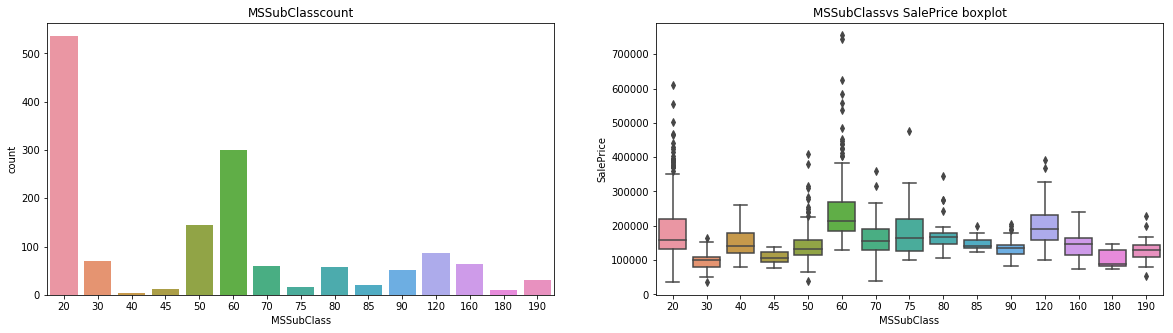

In [14]:
count_box_plot("MSSubClass", data = train_examples)

As we can see, the data distributes in some classes, such as **1-Story** and **2-Story**. In each classes, there are also few subclasses: **NEWER**, **OLDER** and **ALL AGES**.<br>
According to the boxplot, we can see that 1-Story NEWERs are very differ from 1-Story OLDERs. Same pattern can be found in other classes. Therefore, it's a good idea to group all the NEWER, OLDER and ALL AGES observations together.

In [0]:
# Define a fucntion to transform the feature:
def transform_MSSubClass(x):
  classes = {"NEWER" : [20, 60, 120, 160],
         "OLDER" : [30, 70],         
          "ALL-AGES" : [40, 45, 50, 75, 90, 150, 190],          
          "SPLIT" : [80, 85, 180]}  
  for key, values in classes.items():
    if x in values:
      return key
  return "RARE"

In [16]:
train_examples["MSSubClass"] = train_examples["MSSubClass"].apply(lambda x: transform_MSSubClass(x))
train_examples["MSSubClass"].describe()

count      1460
unique        4
top       NEWER
freq        985
Name: MSSubClass, dtype: object

**Now let's plot the data again to see how the changes take effect:**

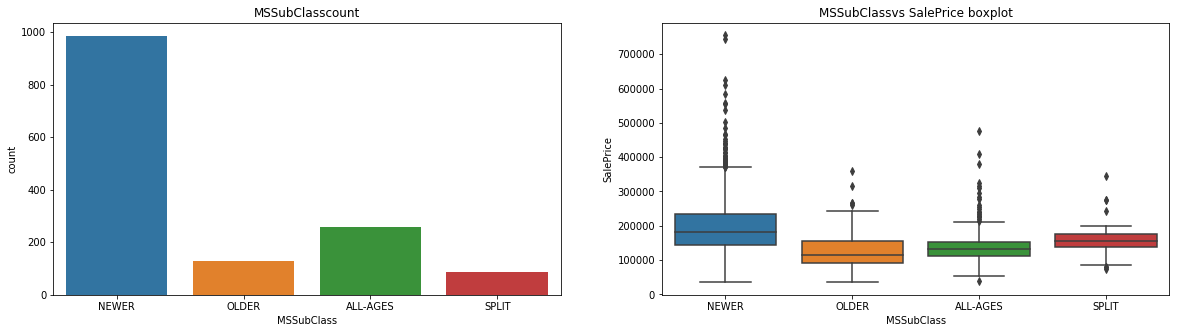

In [17]:
count_box_plot("MSSubClass", data = train_examples)

As we can see, we have managed to reduce the number of unique values as well as keep the classes seperate.<br>
In order to train the model, we need to convert the values to numerical data. **One-hot encoding** is the best option for this type of feature.<br>
**Summary:**
* Grouping the values
* One-hot encoding

### MSZoning

In [18]:
# Take a look at the feature:
show_details("MSZoning")

Feature name:  MSZoning
Description:  Identifies the general zoning classification of the sale.

Values: 
		

       A	Agriculture

       C	Commercial

       FV	Floating Village Residential

       I	Industrial

       RH	Residential High Density

       RL	Residential Low Density

       RP	Residential Low Density Park 

       RM	Residential Medium Density

	

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object
Missing values:
False    1460
Name: MSZoning, dtype: int64


**Visualization**


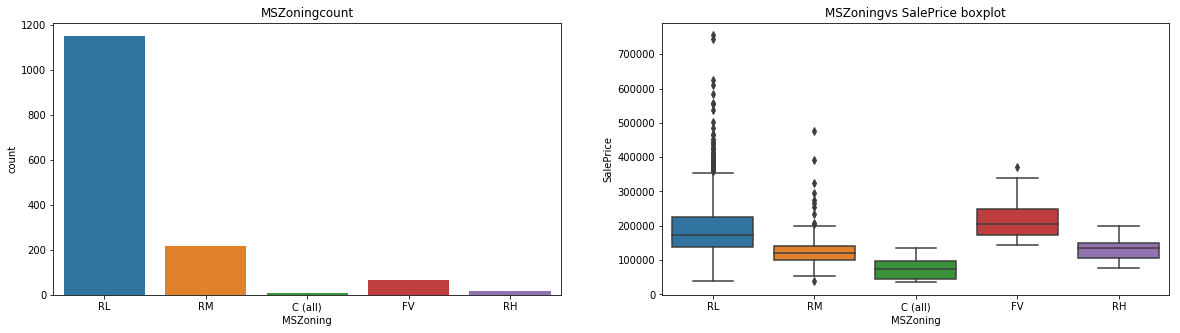

In [19]:
count_box_plot("MSZoning", data = train_examples)

Since the value **RH** appears only a few times, and it's not differ from the value **RM** much, so we can consider grouping them together.<br>
Although **C (all)** only takes a small portion in the data distribution, it's very differ from the rest of the other values, so we will leave it untouched for now.

In [0]:
# Replace the RH values by RM
train_examples["MSZoning"].replace("RH", "RM", inplace = True)

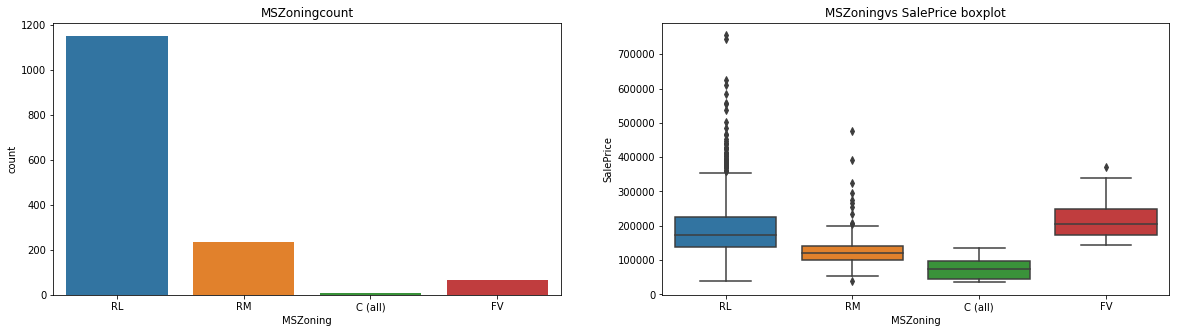

In [21]:
# Plot the data again
count_box_plot(feature = "MSZoning", data = train_examples)

As we can see, **MSZonging** is a good feature to use in our task. We can see that "RL" group has average pricing higer than the other, so instead of one-hot encoding them, we can map them to numerical values.<br>
**Summary:**
* Join "RH" and "RM" values together
* Mapping the values to numerical values.
<hr>

### LotFrontage

In [22]:
# Take a look on the feature:
show_details("LotFrontage", data = train_examples)

Feature name:  LotFrontage
Description:  Linear feet of street connected to property

Values: 


count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
Missing values:
False    1201
True      259
Name: LotFrontage, dtype: int64


**Visualization**<br>
Let's see how the feature values distribute.

Text(0.5, 1.0, 'LotFrontage distribution')

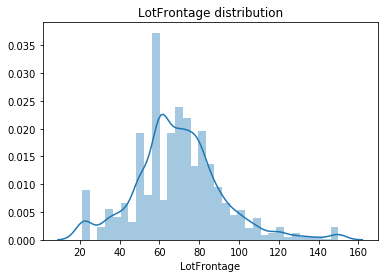

In [33]:
sns.distplot(a = train_examples["LotFrontage"][train_examples["LotFrontage"].notnull()])
plt.title("LotFrontage distribution")

There seems to be some outlines. We better to clip those outlines.

In [0]:
train_examples["LotFrontage"] = train_examples["LotFrontage"].apply(lambda x: min(x, 150))

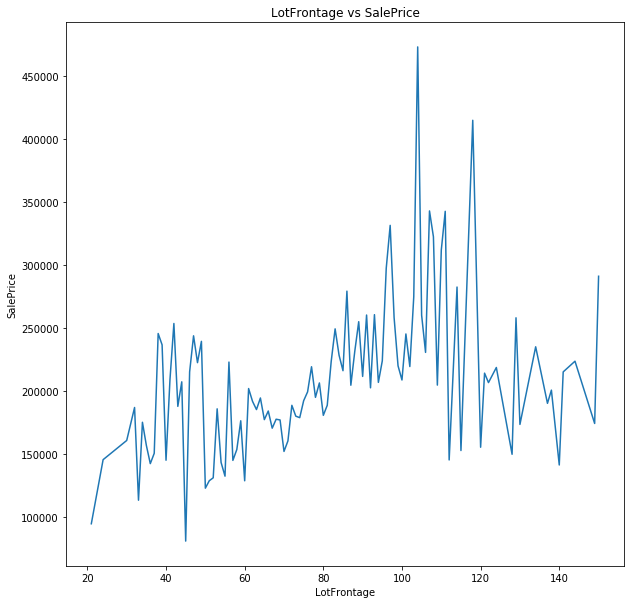

In [35]:
fig = plt.figure(figsize = (10, 10))
sns.lineplot(x = "LotFrontage", y = "SalePrice", data = train_examples, ci = None)
plt.title("LotFrontage vs SalePrice")
plt.show()

Although the values vary alot, we still see something similar to a linear correalation between the feature and the target from 40 to 120. And from the distribution plot, we can see a large portion of the values distribute in this very segment. So for now, we will just normalize the values.<br>

**Missing values**<br>
